# Week 10 - Dimensionality Reduction and Feature Selection

## Learning Objectives

* Introduce dimensionality reduction problem and different numeric methods available in scikit-learn
* General overview of feature selection problem and tools bundled in scikit-learn


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn.metrics
import sklearn.datasets
import sklearn.manifold
import sklearn.decomposition
import sklearn.preprocessing
import sklearn.cluster
import sklearn.feature_selection
import sklearn.ensemble
import sklearn.svm
import sklearn.model_selection

%matplotlib inline

## Features and high-dimensional spaces

Many types of data can contain a large number of variables (features in terms of ML). Dimensionality of the problem is essentially equal to the number of features as data could be interpreted as points in a high-dimensional space.

Example of a 30D benign-vs-malignant classification problem includes 30 features. They describe characteristics of the cell nuclei present in the image: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer.  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Whether this is individual pixels in images, transcripts or genes/proteins in -omics data or word occurrences in text data, a large number of features poses several challenges.

### Visualization difficulties

In particular, visualizing more than three dimensions is difficult, complicating data analysis and exploration.

### Risk of overfitting
Moreover, in machine learning models a large number of features translates into a large number of free parameters. With many parameters to fit, there is a risk of overfitting the models to the data, and having a model that does not generalize to new observations. 

### Solutions
An obvious solution to address these challenges would be reducing the number of features and, consequantly, the dimensionality of the feature space. There are two approaches:

* Transform the data into a lower dimensional space (dimensionality reduction)
* Feature elimination (discard less important features) or feature selection (select more important features)

### Introductory video

Watch this video introducting analysis of high-dimensional data:
https://aiexperiments.withgoogle.com/visualizing-high-dimensional-space


## Part 1. Dimensionality reduction

There are three fundamentally different ways of transforming the feature space:

* __Manifold Learning__ -- optimal for finding non-linear structure in a given dataset, however it may not be able to apply transformation to new data points. Typically it is an unsupervised machine learning problem - no predetermined labels or classification is required. Methods include: Isomap, Locally Linear Embedding (LLE), Spectral Embedding, Multi-dimensional scaling (MDS), t-distributed Stochastic Neighbor Embedding (t-SNE), etc.

* __Decomposition__ -- a set of frameworks for finding optimal linear projections of data onto lower dimensional space without losing much information about the structure within the data. These linear frameworks include Principal Component Analysis (PCA), Independent Component Analysis (ICA), Linear Discriminant Analysis (LDA), Factor Analysis (FA), Dictionary Learning, Non-negative matrix factorization (NMF), etc.  

The main assumption is that the features in a lower-dimensional space (latent variables) represent the true structure of the data despite the large number of observed variables in the original data.


* See scikit example: http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

### 1.1 Example: Synthetic dataset with 7D

(100, 7)


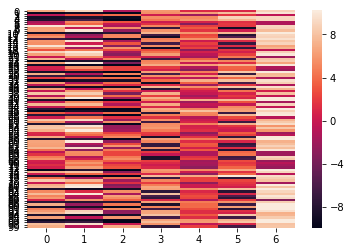

In [18]:
X, y = sklearn.datasets.make_blobs(n_samples=100, centers=4, n_features=7, random_state=0)
print(X.shape)
sns.heatmap(X, robust=True, square=False, yticklabels=True, xticklabels=True, cbar=True)
plt.show()

# D = sklearn.metrics.pairwise_distances(X, metric='euclidean', n_jobs=-1)
# sns.heatmap(D, robust=True, square=True, yticklabels=True, xticklabels=True, cbar=True)
# plt.show()

# plt.hist(np.hstack(D), 20, facecolor='orange', alpha=0.75)
# plt.xlabel('Pairwise distances')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

In [20]:
def scatterplot_2D(R, title, labels=None):
    """ Helper function to plot data points in 2D
        Requires (N, 2) numpy array shape
    """
    assert(R.shape[1] == 2)
    # class labels are turned into colors
    if labels is None:
        c = 'black'
    else:
        color_scale = np.linspace(0, 1, len(set(labels)))
        c = [plt.cm.Set1(color_scale[i]) for i in labels]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.patch.set_facecolor('white')
    ax.scatter(R[...,0], R[...,1], color=c)
    ax.axis('square')
    ax.set_xlabel('R1')
    ax.set_ylabel('R2')
    fig.suptitle(title)
    plt.show()

### 1.2 Non-linear transformations with manifold learning

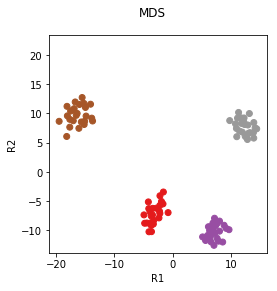

In [21]:
# examples of non-linear transformations:
from sklearn.manifold import MDS, Isomap, TSNE

# NOTE THAT THERE IS NO .transform(X)

R_MDS = MDS(n_components=2).fit_transform(X)
scatterplot_2D(R_MDS, 'MDS', y)

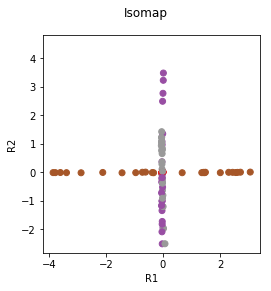

In [22]:
R_ISO = Isomap(n_components=2).fit_transform(X)
scatterplot_2D(R_ISO, 'Isomap', y)

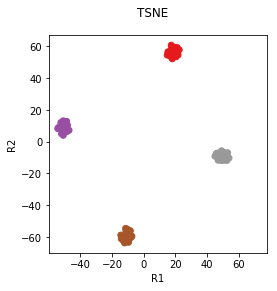

In [23]:
R_TSNE = TSNE(n_components=2, perplexity=10.0).fit_transform(X)
scatterplot_2D(R_TSNE, 'TSNE', y)

### 1.3 Projection to 2D via decomposition


In the general form the decomposition methods take the dataset in the original feature space $\mathbf{X}$ and find a loading matrix $\mathbf{W}$ that transforms $\mathbf{X}$ into a low-dimensional representation $\mathbf{T}$:

$\mathbf{T} = \mathbf{X} \mathbf{W}$

Once the transformation is found for the original dataset it can be applied to other data.

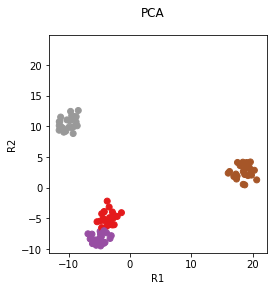

In [38]:
# Examples of projection to 2D via decomposition

# NOTE THAT THERE IS .fit(X) and .transform(X)

# Principal Component Analysis
R_PCA = sklearn.decomposition.PCA(n_components=2).fit_transform(X)
scatterplot_2D(R_PCA, 'PCA', y)

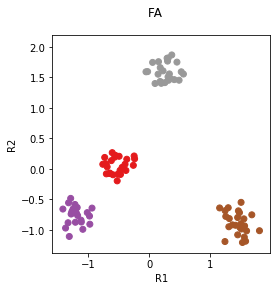

In [39]:
# Factor Analysis
R_FA = sklearn.decomposition.FactorAnalysis(n_components=2).fit_transform(X)
scatterplot_2D(R_FA, 'FA', y)

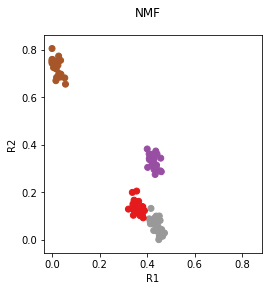

In [40]:
# Nonnegative matrix factorization
# NMF requires non-negative values

X_nonnegative = sklearn.preprocessing.MinMaxScaler().fit_transform(X)
R_NMF = sklearn.decomposition.NMF(n_components=2).fit_transform(X_nonnegative)
scatterplot_2D(R_NMF, 'NMF', y)

###  1.4 Clustering in transformed feature space

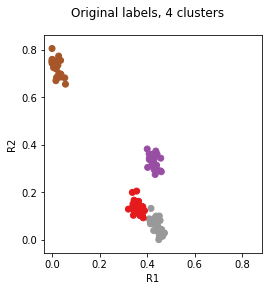

In [45]:
# from sklearn.metrics.cluster import v_measure_score, adjusted_rand_score

# Original labels:
scatterplot_2D(R_NMF, 'Original labels, 4 clusters', y)

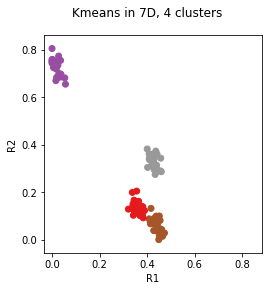

[1 2 0 2 2 0 0 1 3 1 2 3 3 2 1 3 1 3 0 1 1 0 3 2 1 2 0 0 2 3 2 0 2 3 0 2 3
 0 1 0 1 2 0 1 0 2 2 3 2 0 1 3 2 1 1 1 0 0 3 2 1 3 3 1 3 0 0 3 3 0 0 0 0 2
 1 0 2 3 1 0 1 1 2 3 1 3 3 0 2 3 2 3 1 1 2 3 2 2 1 3]
[3 1 0 1 1 0 0 3 2 3 1 2 2 1 3 2 3 2 0 3 3 0 2 1 3 1 0 0 1 2 1 0 1 2 0 1 2
 0 3 0 3 1 0 3 0 1 1 2 1 0 3 2 1 3 3 3 0 0 2 1 3 2 2 3 2 0 0 2 2 0 0 0 0 1
 3 0 1 2 3 0 3 3 1 2 3 2 2 0 1 2 1 2 3 3 1 2 1 1 3 2]
V measure 1.0
Adj. Rand score 1.0


In [46]:
# Clustering the original 7D dataset with KMeans
kmeans = sklearn.cluster.KMeans(n_clusters=4, random_state=0).fit(X)
scatterplot_2D(R_NMF, 'Kmeans in 7D, 4 clusters', kmeans.labels_)
print(y)
print(kmeans.labels_)
print("V measure", sklearn.metrics.cluster.v_measure_score(y, kmeans.labels_))
print("Adj. Rand score", sklearn.metrics.cluster.adjusted_rand_score(y, kmeans.labels_))

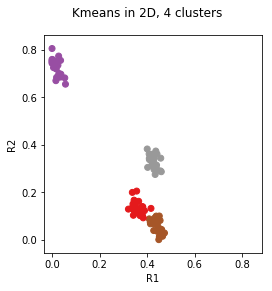

[1 2 0 2 2 0 0 1 3 1 2 3 3 2 1 3 1 3 0 1 1 0 3 2 1 2 0 0 2 3 2 0 2 3 0 2 3
 0 1 0 1 2 0 1 0 2 2 3 2 0 1 3 2 1 1 1 0 0 3 2 1 3 3 1 3 0 0 3 3 0 0 0 0 2
 1 0 2 3 1 0 1 1 2 3 1 3 3 0 2 3 2 3 1 1 2 3 2 2 1 3]
[3 1 0 1 1 0 0 3 2 3 1 2 2 1 3 2 3 2 0 3 3 0 2 1 3 1 0 0 1 2 1 0 1 2 0 1 2
 0 3 0 3 1 0 3 0 1 1 0 1 0 3 2 1 3 3 3 0 0 2 1 3 2 2 3 2 0 0 2 2 0 0 0 0 1
 3 0 1 2 3 0 3 3 1 2 3 2 2 0 1 2 1 2 3 3 1 2 1 1 3 2]
V measure 0.9695647763178208
Adj. Rand score 0.97305763367046


In [47]:
# Clustering 2D dataset
kmeans = sklearn.cluster.KMeans(n_clusters=4, random_state=0).fit(R_NMF)
scatterplot_2D(R_NMF, 'Kmeans in 2D, 4 clusters', kmeans.labels_)
print(y)
print(kmeans.labels_)
print("V measure", sklearn.metrics.cluster.v_measure_score(y, kmeans.labels_))
print("Adj. Rand score", sklearn.metrics.cluster.adjusted_rand_score(y, kmeans.labels_))

###  1.5 Transforming pairwise dissimilarities between objects into feature space

In [56]:
# Original data points (can be unknown)
X, y = sklearn.datasets.make_blobs(n_samples=4, centers=3, n_features=2, random_state=0)

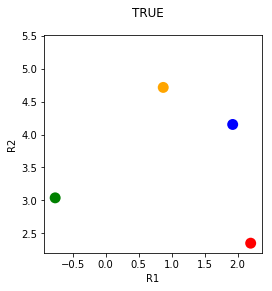

In [57]:
# Since the original dataset is in 2d we can visualize it
fig = plt.figure()
ax = fig.add_subplot(111)
ax.patch.set_facecolor('white')
ax.scatter(X[...,0], X[...,1], c=("red", "green", "blue", "orange"), s=120, edgecolors='none')
ax.set_autoscale_on(False)
ax.axis('square')
ax.set_xlabel('R1')
ax.set_ylabel('R2')
fig.suptitle("TRUE")
plt.show()

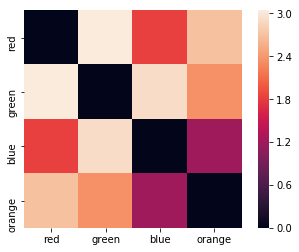

In [58]:
# Pairwise dissimilarities (distances)
D = sklearn.metrics.pairwise_distances(X, metric = 'euclidean')

sns.heatmap(D, robust=True, square=True,
            yticklabels=('red', 'green', 'blue', 'orange'),
            xticklabels=('red', 'green', 'blue', 'orange'), cbar=True)
plt.show()

Stress 0.003213344568382308


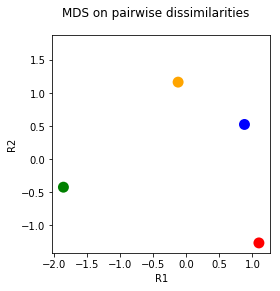

In [59]:
# MDS manifold learning from pairwise distances
M = sklearn.manifold.MDS(n_components=2, n_init=1, max_iter=10000, metric=True, dissimilarity="precomputed")
K = M.fit_transform(D)
# Stress is the measure of error between the original pairwise distances and the pairwise distances in the new space
print("Stress", M.stress_)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.patch.set_facecolor('white')
ax.scatter(K[...,0], K[...,1], c=("red", "green", "blue", "orange"), s=120, edgecolors='none')
ax.set_autoscale_on(False)
ax.axis('square')
ax.set_xlabel('R1')
ax.set_ylabel('R2')
fig.suptitle("MDS on pairwise dissimilarities")
plt.show()

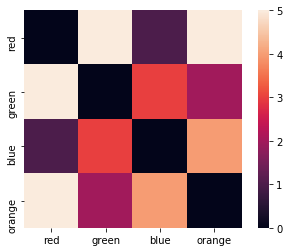

In [78]:
# What if we only know the pairwise distances:
D = np.array(
    [[0, 5, 1, 5],
     [5, 0, 3, 2],
     [1, 3, 0, 4],
     [5, 2, 4, 0]])

sns.heatmap(D, robust=True, square=True,
            yticklabels=('red', 'green', 'blue', 'orange'),
            xticklabels=('red', 'green', 'blue', 'orange'), cbar=True)
plt.show()

Stress 0.34899711654192056


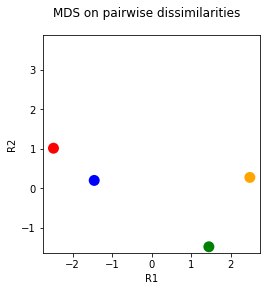

In [86]:
# MDS manifold learning from pairwise distances
M = sklearn.manifold.MDS(n_components=2, n_init=1, max_iter=10000, metric=True, dissimilarity="precomputed")
K = M.fit_transform(D)
print("Stress", M.stress_)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.patch.set_facecolor('white')
ax.scatter(K[...,0], K[...,1], c=("red", "green", "blue", "orange"), s=120, edgecolors='none')
ax.set_autoscale_on(False)
ax.axis('square')
ax.set_xlabel('R1')
ax.set_ylabel('R2')
fig.suptitle("MDS on pairwise dissimilarities")
plt.show()

### 1.6. Example: NMF decomposition of Gene expression in Breast Cancer (BRCA)

In [88]:
expression_fname = 'https://dcc.icgc.org/api/v1/download?fn=/release_18/Projects/BRCA-US/protein_expression.BRCA-US.tsv.gz'

E = pd.read_csv(expression_fname, delimiter='\t')
E.head()

,icgc_donor_id,project_code,icgc_specimen_id,icgc_sample_id,submitted_sample_id,analysis_id,antibody_id,gene_name,gene_stable_id,gene_build_version,normalized_expression_level,verification_status,verification_platform,platform,experimental_protocol,raw_data_repository,raw_data_accession
0,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,PAI-1,SERPINE1,NaN,NaN,1.769954,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
1,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,ARID1A,ARID1A,NaN,NaN,0.619539,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
2,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,mTOR_pS2448,FRAP1,NaN,NaN,-0.538637,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
3,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,ASNS,ASNS,NaN,NaN,1.156044,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
4,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,EGFR,EGFR,NaN,NaN,0.120138,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20


In [97]:
donors = set(E['icgc_donor_id'])
genes = set(E['gene_name'])
antibodies = set(E['antibody_id'])

print("Donors (data points):", len(donors))
print("Genes (features?): ", len(genes))
print("Antibodies (features?): ", len(antibodies))

Donors (data points): 298
Genes (features?):  115
Antibodies (features?):  142


In [107]:
E = E[['icgc_donor_id', 'gene_name', 'antibody_id', 'normalized_expression_level']]
E.head()

,icgc_donor_id,gene_name,antibody_id,normalized_expression_level
0,DO4143,SERPINE1,PAI-1,1.769954
1,DO4143,ARID1A,ARID1A,0.619539
2,DO4143,FRAP1,mTOR_pS2448,-0.538637
3,DO4143,ASNS,ASNS,1.156044
4,DO4143,EGFR,EGFR,0.120138


In [109]:
E_mean = E.groupby(['icgc_donor_id','gene_name']).mean()
E_mean.head()

34270


In [113]:
E_mean_wide = E_mean.unstack()
E_mean_wide.head()

normalized_expression_level                             \
gene_name                           ACACA ACACA ACACB AKT1 AKT2 AKT3   
icgc_donor_id                                                          
DO1251                           0.951190    0.892499      -0.049270   
DO1254                           1.376032    1.162665      -0.230698   
DO1258                          -0.402049   -0.322389      -0.200169   
DO1261                           1.361227    1.512532       0.422522   
DO1265                          -0.438206   -0.111050       0.112957   

                                                                           \
gene_name        AKT1S1      ANLN     ANXA1        AR      ARAF    ARID1A   
icgc_donor_id                                                               
DO1251        -0.030702 -0.199795 -0.905293  0.775228  0.094701  0.071743   
DO1254         0.137399 -0.114772 -0.215406  0.790482  0.134960 -0.030072   
DO1258        -0.064827 -0.081590  0.455625 -1.141689 -0.084109  0.114474   
DO1261         0.045455 -0.127973  0.290133  0.128472  0.216368 -0.440709   
DO1265        -0.068587 -0.041141 -0.614681  1.305268  0.145583  0.056447   

                           ...                                             \
gene_name          ASNS    ...         TGM2      TP53   TP53BP1      TSC2   
icgc_donor_id              ...                                              
DO1251        -0.470252    ...    -0.412749 -0.476795  0.010220  0.480902   
DO1254         0.231021    ...     0.286778 -0.502465  0.147657 -0.353349   
DO1258         0.871303    ...     0.047575  0.631423 -0.387374 -0.290853   
DO1261        -0.090565    ...    -0.289742 -0.131251 -0.230038 -0.052135   
DO1265         0.647928    ...    -0.016497 -0.222350  0.393662  0.139152   

                                                                           
gene_name          XBP1     XRCC1     XRCC5      YAP1      YBX1     YWHAE  
icgc_donor_id                                                              
DO1251         0.103099  0.025000 -0.386469 -0.604077  0.060155 -0.175260  
DO1254        -0.278673  0.298895 -0.224370 -0.532751 -0.164356  0.251877  
DO1258        -0.454089 -0.044778  0.222834  0.808895 -0.085985  0.007288  
DO1261        -0.132621 -0.060915  0.109820  0.642813 -0.026739 -0.214638  
DO1265        -0.096189 -0.130505  0.407023  0.009202  0.020125 -0.036943  

[5 rows x 115 columns]

In [126]:
# Scale data to non-negative values
X = sklearn.preprocessing.MinMaxScaler().fit_transform(E_mean_wide)

X ~ W dot H + error
X =  (298, 115)
W =  (10, 115)
H =  (298, 10)
Error =  19.46194094134976


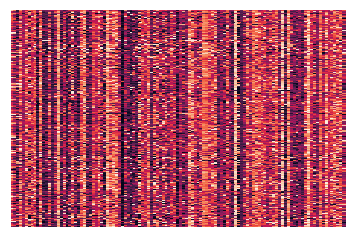

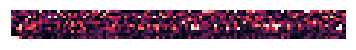

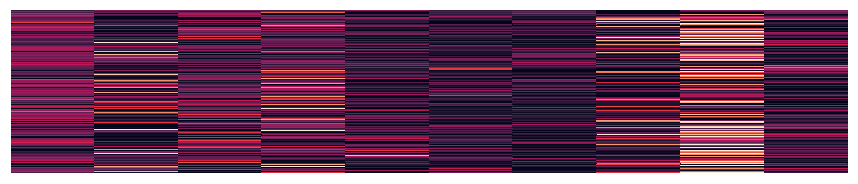

In [127]:
# NMF DECOMPOSITION

rank = 10
nmf = sklearn.decomposition.NMF(n_components=rank).fit(X)
W = nmf.components_
H = nmf.transform(X)
print("X ~ W dot H + error")
print("X = ", X.shape)
print("W = ", W.shape)
print("H = ", H.shape)
print("Error = ", nmf.reconstruction_err_)

sns.heatmap(X, robust=True, square=False, yticklabels=False, xticklabels=False, cbar=False)
plt.show()
g, ax = plt.subplots(figsize=(6,6))
sns.heatmap(W,  robust=True, square=True, yticklabels=False, xticklabels=False, cbar=False)
plt.show()
g, ax = plt.subplots(figsize=(15, 3))
sns.heatmap(H, robust=True,  square=False, yticklabels=False, xticklabels=False, cbar=False)
plt.show()

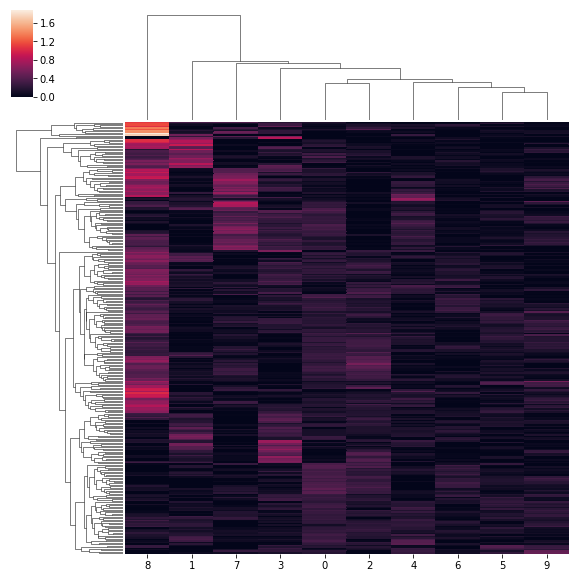

In [128]:
# Clustering in reduced feature space (10D)

sns.clustermap(H, xticklabels=True, yticklabels=False)
plt.show()

Features in the transformed space -- latent variables -- represent groups of genes with similar protein expression patterns in Breast Cancer. These could be, for instance, genes involved in the same pathway. 

Clustering also shows groups of donors with similar expression across the groups of genes. It could be helpful for defining molecular subtypes of breast cancer.

(115,)


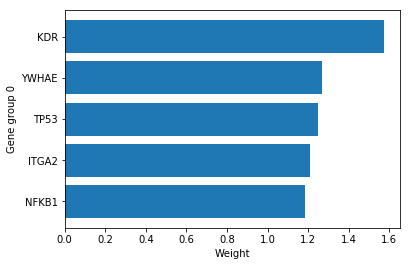

(115,)


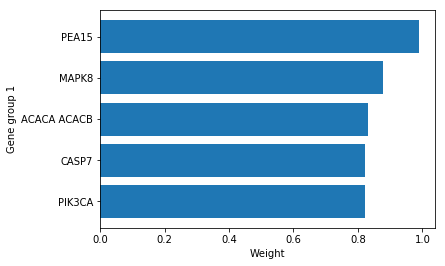

(115,)


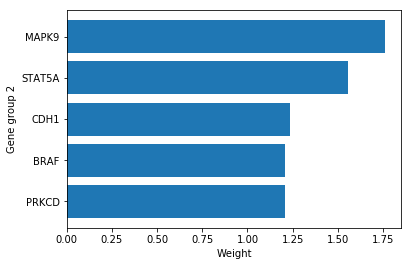

(115,)


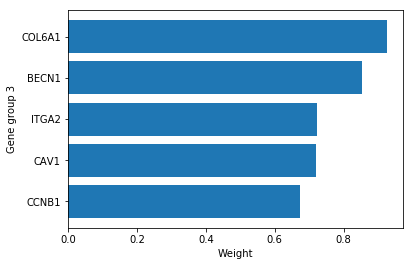

(115,)


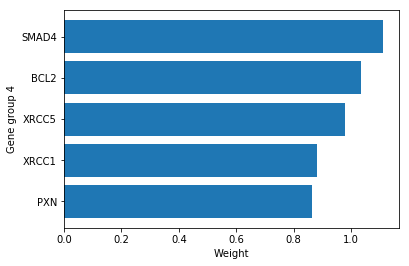

(115,)


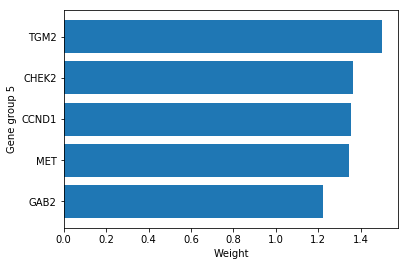

(115,)


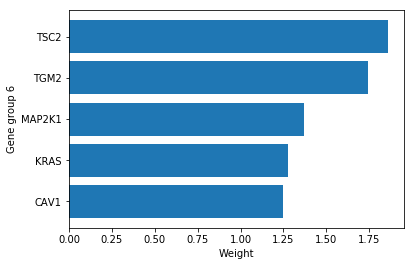

(115,)


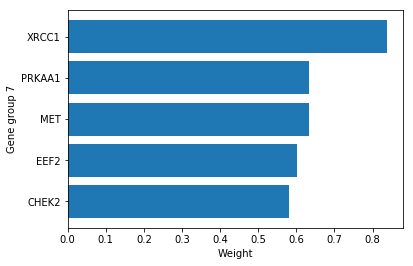

(115,)


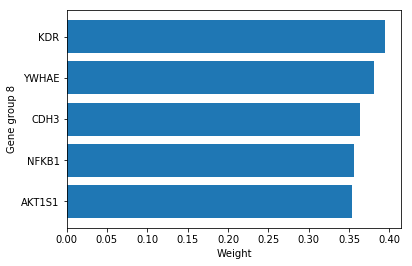

(115,)


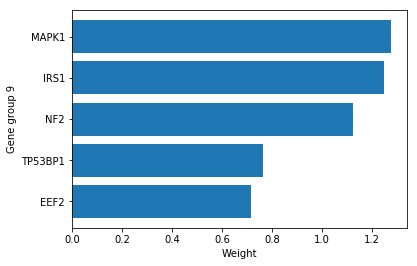

In [130]:
# Show top 5 genes in each gene group

for gene_group in range(H.shape[1]):
    k = 5
    print(W[gene_group, :].shape)
    topk = np.argsort(np.asarray(W[gene_group, :]).flatten())[-k:]
    # print("Indices of related genes", topk)
    val = W[gene_group, topk]
    # print("Gene weights", val)
    plt.barh(np.arange(k) + .5, val, align="center")
    labels = [id2gene[idx] for idx in topk]
    plt.yticks(np.arange(k) + .5, labels)
    plt.xlabel("Weight")
    plt.ylabel("Gene group {}".format(gene_group));
    plt.show()

## 2. Feature Selection

[Feature selection](http://scikit-learn.org/stable/modules/feature_selection.html) can be used to choose the most informative features. This can improve the performance of subsequent models, reduce overfitting and have practical advantages when the model is ready to be utilized.

For instance, we should avoid features with confounding factors (not linearly independent) in linear models, such as linear regression.

There are a variety of approaches for feature selection:

* Remove uninformative features (same value for all, or nearly all, samples)
* Remove features that perform poorly at the task when used alone
* Iteratively remove the weakest features from a model until the desires number is reached


### 2.1 Variance threshold

In [147]:
X = np.array([[1, 0, 0, 1],
              [1, 0, 1, 0],
              [1, 1, 0, 0],
              [1, 0, 1, 1],
              [1, 0, 1, 0],
              [1, 0, 1, 1]])

sel = sklearn.feature_selection.VarianceThreshold(threshold=0.2)
sel.fit(X)
print(sel.variances_)
X_selected = sel.transform(X)
print(X_selected)

[0.         0.13888889 0.22222222 0.25      ]
[[0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]]


In [148]:
### 2.2 KBest features

In [161]:
print(sklearn.feature_selection.chi2.__doc__[:610])

Compute chi-squared stats between each non-negative feature and class.

    This score can be used to select the n_features features with the
    highest values for the test chi-squared statistic from X, which must
    contain only non-negative features such as booleans or frequencies
    (e.g., term counts in document classification), relative to the classes.

    Recall that the chi-square test measures dependence between stochastic
    variables, so using this function "weeds out" the features that are the
    most likely to be independent of class and therefore irrelevant for
    classification.

  


In [172]:
print(sklearn.datasets.load_iris.__doc__[:413])

iris = sklearn.datasets.load_iris()
X, y = iris.data, iris.target
print(X.shape)

# select top 2 best features in terms of Chi-squared statistics
X_new = sklearn.feature_selection.SelectKBest(sklearn.feature_selection.chi2, k=2).fit_transform(X, y)
print(X_new.shape)

Load and return the iris dataset (classification).

    The iris dataset is a classic and very easy multi-class classification
    dataset.

    =================   ==============
    Classes                          3
    Samples per class               50
    Samples total                  150
    Dimensionality                   4
    Features            real, positive
    =================   ==============
(150, 4)
(150, 2)


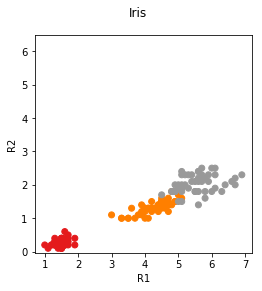

In [174]:
scatterplot_2D(X_new, 'Iris', y)

### 2.2 "Feature selection" translates to "model selection"

Iteratively removing or adding features means we change the number of the parameters for the machine learning model.

Essentially, it means that we will be comparing models built with different sets of features. However, adding more features can lead to a better fitting of the model and can cause overfitting. Therefore, the models have to be penalized for an excessive number of features (parameters).

“when you have two competing theories that make exactly the same predictions, the simpler one is the better.” - William of Ockham

So for a regression model ![](http://scikit-learn.org/stable/_images/math/334dd847bce79ed52a760f02b3efd8faefdb6e8b.png) LASSO (least absolute shrinkage and selection operator), or more commonly referred to as L1 regularization, could be used to penalize for the large number of parameters.

* L1 regularization (the last term of the equation) favors a sparse model with  features having coefficients equal to zero or close to zero:

![](http://scikit-learn.org/stable/_images/math/07c30d8004d4406105b2547be4f3050048531656.png)

L1 norm is simply a sum of absolute values of coefficients. Alpha regulates the strength of regularization.

In the breast cancer example that would mean that we favor a test with less antibodies required in the test panel.


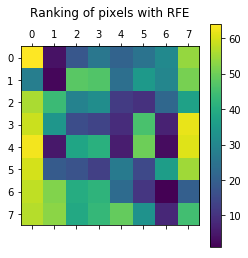

In [176]:
# Load the digits dataset
digits = sklearn.datasets.load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Create the RFE (Recursive feature elimination) object and rank each pixel
# Use L1 regularization
clf = sklearn.linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
rfe = sklearn.feature_selection.RFE(estimator=clf, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking) # cmap=plt.get_cmap('summer')
plt.colorbar()
plt.title("Ranking of pixels with RFE\n")
plt.show()

The disadvantage with L1 regularization is that if multiple features are correlated only one of them will have a high coefficient.

Also important is to normalize the means and variances of the features before comparing the coefficients.

A limitation of linear models is that any interactions must be hand coded. A feature that is poorly predictive **overall** may actually be very powerful but only **in a limited subgroup** (e.g. in patients with a particular mutation). This might be missed in a linear model when we would prefer to keep the feature.

Any model exposing a `coef_` or `feature_importances_` attribute can be used with the `SelectFromModel` class for feature selection. [Random Forest](http://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees) handles interactions well and unlike some of the other models does not require careful tuning of parameters to achieve reasonable performance.

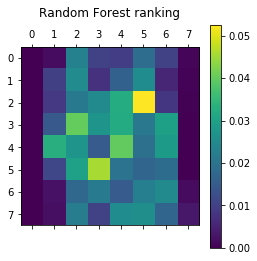

In [177]:
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=100)
clf.fit(X, y)
ranking = clf.feature_importances_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking)
plt.colorbar()
plt.title("Random Forest ranking\n")
plt.show()

### 2.3 Feature selection with cross-validation 

Number of features corresponding to max CV score : 8


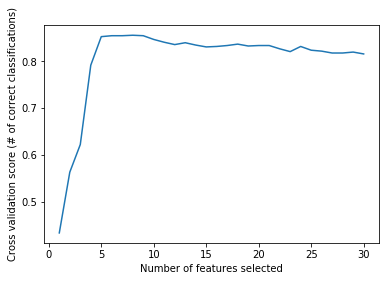

In [178]:
# Build a classification task using 5 informative features
X, y = sklearn.datasets.make_classification(n_samples=1000, n_features=30, n_informative=5,
                           n_redundant=4, n_repeated=0, n_classes=4,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = sklearn.svm.SVC(kernel="linear", class_weight="balanced")
rfecv = sklearn.feature_selection.RFECV(estimator=svc,
                                        step=1,
                                        cv=sklearn.model_selection.StratifiedKFold(2),
                                        scoring='accuracy')
rfecv.fit(X, y)

print("Number of features corresponding to max CV score : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (# of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

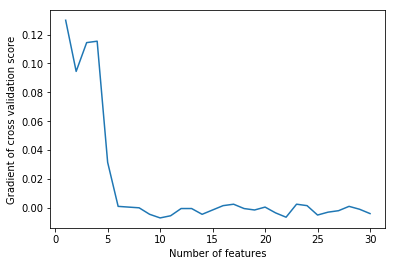

In [192]:
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("Gradient of cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), np.gradient(rfecv.grid_scores_))
plt.show()

## Assignment

1. Apply feature selection to the [Olivetti faces dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html#sklearn.datasets.fetch_olivetti_faces),
    identifying the most important 25% of features based on the chi2 criteria.  This dataset consists of 10 pictures each of 40 individuals. You can visualize these top selected features on a 64x64 pixel heatmap for visual aid.
    
2. Apply tSNE to the digits dataset (transform to 2D) and perform K-means clustering into 10 clusters in 2D space. calculate sklearn.metrics.adjusted_rand_score between the labels obtained in clustering and the original labels.
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html


### Optional exercise:

* Use BRCA gene (protein) expression data provided in this class. Apply K-means clustering to the original expression data and to the result of NMF decomposition with 10 components (H matrix). For simplicity, use k=10 as the number of clusters in K-means. Calculate adjusted_rand_score as a measure of consensus between the two resulting sets of clustering labels.
